In [1]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
import pydot
from IPython.display import Image  
from sklearn.tree import DecisionTreeRegressor
def draw_tree(tree):
    dot_data = StringIO()
    export_graphviz(tree, out_file=dot_data,  
                             filled=True, rounded=True,  
                             special_characters=True)  
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    return Image(graph.create_png())

Create the sample

In [2]:
import numpy as np

def sum_func(X, a=2):
    X = np.asarray(X)
    return np.sin(X)

n = 1000
x_min, x_max = 0, 20.
X = np.random.uniform(x_min, x_max, (n)).reshape(n, 1)
y = sum_func(X)

Draw to show it works

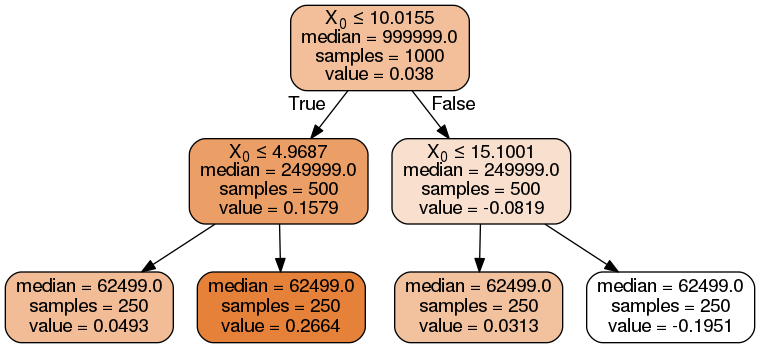

In [3]:
draw_tree(DecisionTreeRegressor("median", max_depth=2).fit(X, y))

It is different from the MSE tree obvioulsy

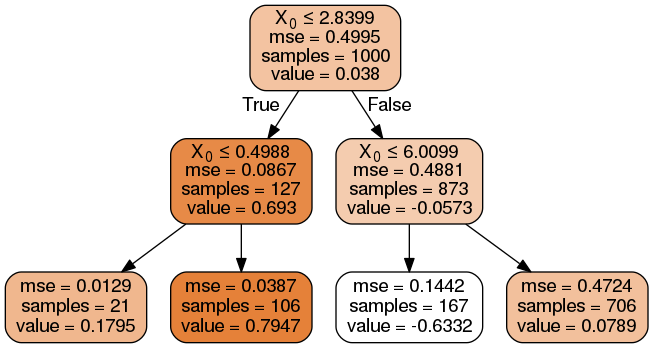

In [4]:
draw_tree(DecisionTreeRegressor("mse", max_depth=2).fit(X, y))

Create the median and mse trees

In [5]:
tree_median = DecisionTreeRegressor("median", min_samples_leaf=1).fit(X, y)
tree_mse = DecisionTreeRegressor("mse", min_samples_leaf=1).fit(X, y)

In [6]:
x = np.linspace(x_min, x_max, (n)).reshape(n, 1)

pred_median = tree_median.predict(x)
pred_mse = tree_mse.predict(x)

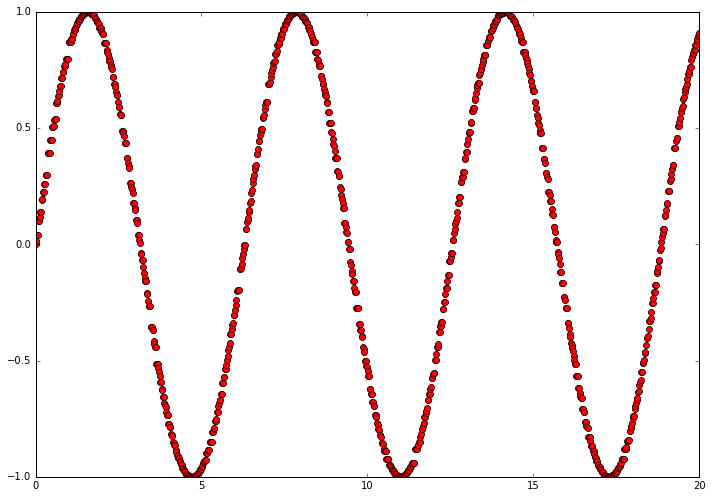

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(X, y, '.k')
ax.plot(x, pred_mse, 'bo')
ax.plot(x, pred_median, 'ro')

fig.tight_layout()

In [8]:
from sklearn.ensemble import RandomForestRegressor

In [13]:
forest_mse = RandomForestRegressor(criterion="mse", max_features=1, verbose=1).fit(X, y.ravel())
pred_mse_forest = forest_mse.predict(x)

forest_median = RandomForestRegressor(criterion="median", max_features=1).fit(X, y.ravel())
pred_median_forest = forest_median.predict(x)

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


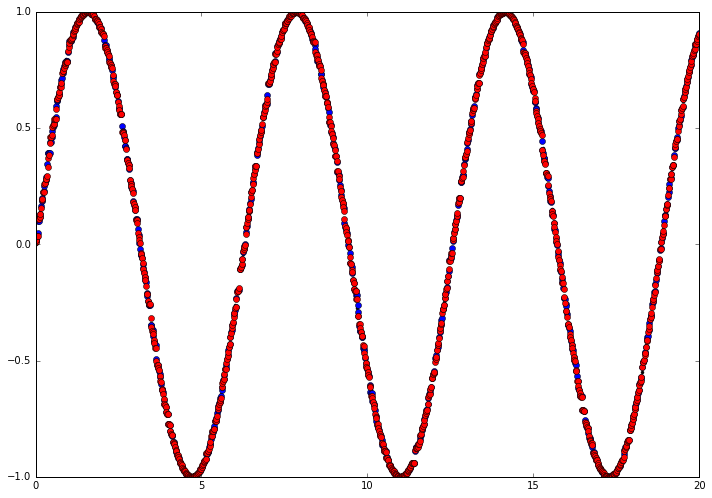

In [10]:
fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(X, y, '.k')
ax.plot(x, pred_mse_forest, 'bo')
ax.plot(x, pred_median_forest, 'ro')

fig.tight_layout()

In [11]:
import sys
sys.path.append("../../These/Scripts/library/randomForest")

In [12]:
from quantForest import QuantileForest